# Text Preprocessing

Perform text preprocessing and visualization on the dataset containing Wikipedia texts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from warnings import filterwarnings


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

reading data

In [2]:

df = pd.read_csv('wiki_data.csv', index_col=0)

df.head()
df = df[:2000]

df.shape

(2000, 1)

Task 1: Write a function that will perform pre-processing operations on the text.<br>
  • Convert upper and lower case letters.<br>
  • Remove punctuation marks.<br>
  • Remove numerical expressions.<br>

In [3]:
def clean_text(text):
    text = text.str.lower()

    text = text.str.replace(r'[^\w\s]', '', regex=True)

    text = text.str.replace("\n", '', regex=True)

    text = text.str.replace('\d', '', regex=True)

    return text

In [5]:
df['text'] = clean_text(df['text'])

df.head()

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


Task 2: Write a function that will remove unimportant words when extracting features from the text.

In [6]:
import nltk

nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df['text'] = remove_stopwords(df['text'])

In [8]:
df['text']

1       anovoanovo formerly novo computer services com...
2       battery indicatora battery indicator also know...
3       bob peaserobert allen pease august â â june an...
4       cavnetcavnet secure military forum became oper...
5       clidarthe clidar scientific instrument used me...
                              ...                        
1996    edinburgh calotype clubthe edinburgh calotype ...
1997    endrinendrin organochloride chemical formula c...
1998    ethylene glycol dinitrateethylene glycol dinit...
1999    forges de syamthe forges de syam syam forges f...
2000    frankkamenetskii theoryin combustion frankkame...
Name: text, Length: 2000, dtype: object

Task 3: Find less recurring words in the text.

In [9]:
delete = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

Task 4: Remove less repetitive words from the text. (Hint: use the lambda function.)

In [10]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in  delete))

Task 5: Tokenize the texts and observe the results.

In [11]:
nltk.download('punkt')

df['text'].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1    [anovoanovo, formerly, novo, computer, service...
2    [battery, indicatora, battery, indicator, also...
3    [bob, peaserobert, allen, pease, august, â, â,...
4    [cavnetcavnet, secure, military, forum, became...
5    [clidarthe, clidar, scientific, instrument, us...
Name: text, dtype: object

Task 6: Perform the Lemmatization process.

In [12]:
nltk.download('wordnet')

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
1,anovoanovo formerly novo computer service comp...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pea august â â june anal...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


Task 7: Calculate the frequencies of the terms in the text. (Hint: Required for barplot chart)

In [13]:
tf = df['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.head()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)

,words,tf
37,used,5543.00
49,system,5040.00
58,also,4207.00
596,one,3129.00
220,â,3022.00
...,...,...
44354,himselfduring,1.00
44355,spotonce,1.00
44356,doubleelimination,1.00
44357,reassignment,1.00


Task 8: Create the barplot chart.

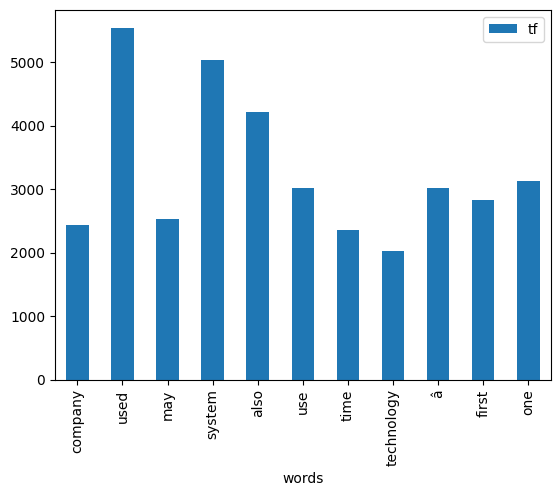

In [14]:
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

Visualize words with WordCloud.

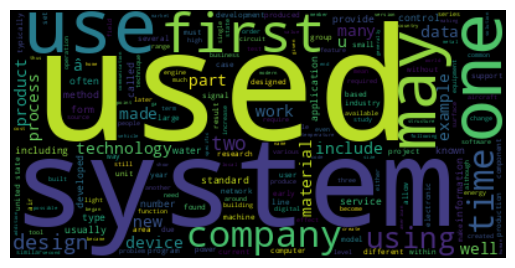

In [15]:
text = " ".join(i for i in df.text)


#default olan
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

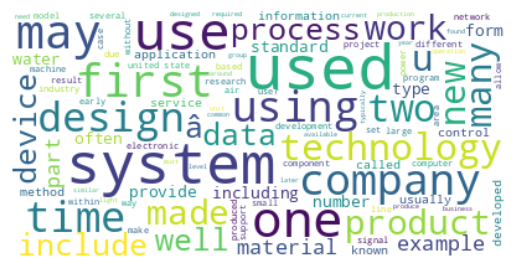

In [16]:
# wordcloud görselleştirmenin özelliklerini belirliyoruz
wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()